In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3
import datetime as dt

In [3]:
df = pd.read_csv("prosperLoanData.csv")

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.shape

(113937, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

In [7]:
# Checking DataTime 

In [8]:
df["ListingCreationDate"] = pd.to_datetime(df["ListingCreationDate"])
df["LoanOriginationDate"] = pd.to_datetime(df["LoanOriginationDate"])
df["ClosedDate"] = pd.to_datetime(df["ClosedDate"])
df["DateCreditPulled"] = pd.to_datetime(df["DateCreditPulled"])

In [9]:
df.CreditGrade

0           C
1         NaN
2          HR
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11          C
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17         AA
18        NaN
19        NaN
20        NaN
21          D
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
113907    NaN
113908    NaN
113909    NaN
113910    NaN
113911    NaN
113912    NaN
113913    NaN
113914     HR
113915      D
113916    NaN
113917    NaN
113918      A
113919    NaN
113920    NaN
113921     AA
113922      C
113923      B
113924    NaN
113925    NaN
113926      E
113927     AA
113928    NaN
113929    NaN
113930    NaN
113931    NaN
113932    NaN
113933    NaN
113934    NaN
113935    NaN
113936    NaN
Name: CreditGrade, Length: 113937, dtype: object

In [10]:
df.PercentFunded

0         1.0000
1         1.0000
2         1.0000
3         1.0000
4         1.0000
5         1.0000
6         1.0000
7         1.0000
8         1.0000
9         1.0000
10        1.0000
11        1.0000
12        1.0000
13        1.0000
14        0.7731
15        1.0000
16        1.0000
17        1.0000
18        1.0000
19        1.0000
20        1.0000
21        1.0000
22        1.0000
23        1.0000
24        1.0000
25        1.0000
26        1.0000
27        1.0000
28        1.0000
29        1.0000
           ...  
113907    1.0000
113908    1.0000
113909    1.0000
113910    1.0000
113911    1.0000
113912    1.0000
113913    1.0000
113914    1.0000
113915    1.0000
113916    1.0000
113917    1.0000
113918    1.0000
113919    1.0000
113920    1.0000
113921    1.0000
113922    1.0000
113923    1.0000
113924    1.0000
113925    1.0000
113926    1.0000
113927    1.0000
113928    1.0000
113929    1.0000
113930    1.0000
113931    1.0000
113932    1.0000
113933    1.0000
113934    1.00

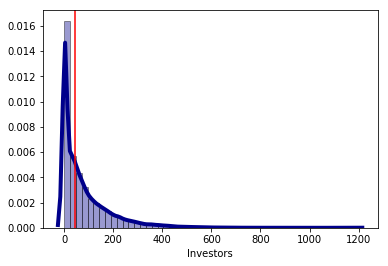

In [20]:
sns.distplot(df.Investors, hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(df.Investors.median(),c='r') 